In [1]:
from datetime import datetime

import pandas as pd
import numpy as np

import codecs, json 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split

import xgboost as xgb

from sklearn.metrics import mean_squared_error

import scipy

In [2]:
with open('data_rich_ac') as json_file:
    json_data = json.load(json_file)

In [3]:
frames = []
for j in range(len(json_data['tables'])):
    df = pd.DataFrame(np.array(json_data['tables'][j]['table'])[:,:], 
                           columns = json_data['tables'][j]['header']['variables'][:])
    df['state'] = json_data['tables'][j]['header']['flightphase']
    if df['state'][0] == 'cruise':
        frames.append(df)
    
df = pd.concat(frames,ignore_index=True)
df = df[['DISA','ALTITUDE','MASS','MACH','FUELFLOW']]

In [79]:
#sample = df.sample(5)
#sample_x = sample.drop(['FUELFLOW'], axis=1)
#sample_y = sample.FUELFLOW
#df_model = df[~df.index.isin(sample_x.index)]

#df = df.sample(10000).reset_index()

X = df.drop(['FUELFLOW'], axis=1)
y = df.FUELFLOW

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [80]:
point = X_test.iloc[0]

X_train['distance'] = X_train.sub(point).pow(2).sum(1).pow(0.5)
X_train= X_train.sort_values(['distance']).iloc[0:20]
X_train = X_train.drop(['distance'],axis=1).reset_index()
X_train.columns = ['index_', 'DISA', 'ALTITUDE', 'MASS','MACH']
#y_train = y_train.reset_index()
y_train.columns = ['index_', 'FUELFLOW']
X_train = X_train.join(y_train, on = 'index_', lsuffix='-', how='left',)
X_train

#interpolate = scipy.interpolate.griddata(
#                        X_train.drop(['index_', 'FUELFLOW'], axis =1),
#                        X_train.FUELFLOW, point, method='linear')


/Users/Navid/opt/anaconda3/envs/exjobb/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index_,DISA,ALTITUDE,MASS,MACH,FUELFLOW
0,41559,-10.0,8000.0,64000.0,0.460000,0.322265
1,39608,-10.0,8000.0,64000.0,0.440000,0.307970
2,43609,-10.0,8000.0,64000.0,0.480000,0.339474
3,3667,-10.0,8000.0,64000.0,0.480306,0.339761
4,37778,-10.0,8000.0,64000.0,0.420000,0.297245
5,45770,-10.0,8000.0,64000.0,0.500000,0.359405
6,36061,-10.0,8000.0,64000.0,0.400000,0.289225
7,48024,-10.0,8000.0,64000.0,0.520000,0.378119
8,50374,-10.0,8000.0,64000.0,0.540000,0.397406
9,32971,-10.0,8000.0,64000.0,0.360000,0.273124


In [82]:
print(X_train.drop(['index_', 'FUELFLOW'],axis=1))
print(point)

    DISA  ALTITUDE     MASS      MACH
0  -10.0    8000.0  64000.0  0.460000
1  -10.0    8000.0  64000.0  0.440000
2  -10.0    8000.0  64000.0  0.480000
3  -10.0    8000.0  64000.0  0.480306
4  -10.0    8000.0  64000.0  0.420000
5  -10.0    8000.0  64000.0  0.500000
6  -10.0    8000.0  64000.0  0.400000
7  -10.0    8000.0  64000.0  0.520000
8  -10.0    8000.0  64000.0  0.540000
9  -10.0    8000.0  64000.0  0.360000
10 -10.0    8000.0  64000.0  0.340000
11 -10.0    8000.0  64000.0  0.320000
12 -10.0    8000.0  64000.0  0.607269
13 -10.0    8000.0  64000.0  0.607269
14 -10.0    8000.0  64000.0  0.607269
15 -10.0    8000.0  64000.0  0.607269
16 -10.0    8000.0  64000.0  0.607269
17 -10.0    8000.0  64000.0  0.607269
18 -10.0    8000.0  64000.0  0.607269
19 -10.0    8000.0  64000.0  0.607269
DISA          -10.000000
ALTITUDE     8000.000000
MASS        64000.000000
MACH            0.458692
Name: 885, dtype: float64


In [ ]:
X_train['distance'] = X_train.sub(test).pow(2).sum(1).pow(0.5) # maybe cutoff based on input
z = X_train.sort_values('distance').iloc[0:4]
z = z.drop(['distance'],axis = 1)
z = z.reset_index()
z.columns = ['index_', 'DISA', 'ALTITUDE', 'MASS', 'MACH']
y_train.columns = ['index_', 'FUELFLOW']
z = z.join(y_train, on = 'index_', how = 'left')
#z = z.drop(['index_'], axis=1)

In [48]:
y_train

,index_,FUELFLOW
0,16216,0.506666
1,489,0.418676
2,31362,0.290552
3,69886,0.538223
4,50386,0.403749
...,...,...
63075,50621,0.187337
63076,56442,0.498579
63077,40224,0.232854
63078,69285,0.387493


In [5]:
xgb_ = xgb.XGBRegressor().fit(X_train,y_train)

/Users/Navid/opt/anaconda3/envs/exjobb/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:16:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [6]:
interpolate = scipy.interpolate.griddata(X_train, y_train, X_test, method='nearest')

/Users/Navid/opt/anaconda3/envs/exjobb/lib/python3.7/site-packages/pandas/core/series.py:1146: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [ ]:

np_array_x_test = np.array(X_test)

interpolate_array = []

def int_func(inpute_values):
    try:
        interpolated_values = interpolate(inpute_values)
    except KeyError as e:
        return 'null'
    return interpolated_values.iloc[0]
        
for i in np_array_x_test:
    interpolate_array.append(int_func(i))

In [ ]:
interpolated_array = np.array(interpolate_array)
true_value_array = np.array(y_test)

output_df = pd.DataFrame({'true':true_value_array, 'inter':interpolated_array})

In [7]:
output_df = pd.DataFrame({'true':np.array(y_test), 'inter':np.array(interpolate)}).dropna(axis=0)
mean_squared_error(output_df.true,output_df.inter)

0.021383144819470037

In [8]:
predicted = xgb_.predict(X_test)
output_df = pd.DataFrame({'true':np.array(y_test), 'inter':np.array(predicted)}).dropna(axis=0)
mean_squared_error(output_df.true,output_df.inter)

0.00015035059678923928

In [9]:
X_test['FUELFLOW'] = np.array(y_test)
X_test['predicted_xgb'] = np.array(predicted)
X_test['predicted_int'] = np.array(interpolate)

/Users/Navid/opt/anaconda3/envs/exjobb/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/Navid/opt/anaconda3/envs/exjobb/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Navid/opt/anaconda3/envs/exjobb/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

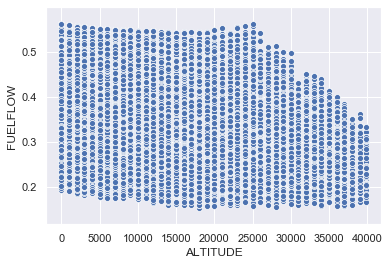

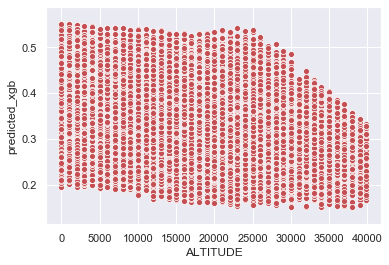

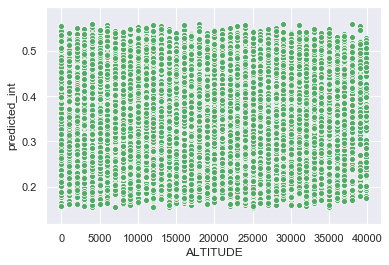

In [11]:
sns.scatterplot(x='ALTITUDE',y='FUELFLOW', data=X_test,color='b')
plt.show()

sns.scatterplot(x='ALTITUDE',y='predicted_xgb', data=X_test,color='r')
plt.show()

sns.scatterplot(x='ALTITUDE',y='predicted_int', data=X_test,color='g')
plt.show()

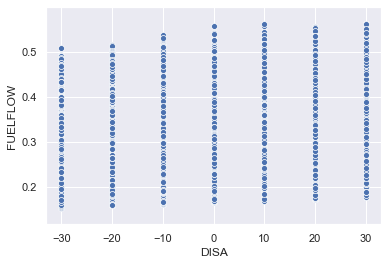

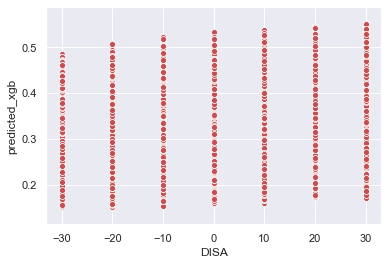

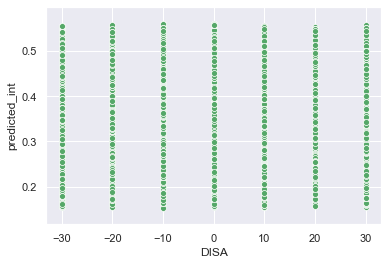

In [14]:
sns.scatterplot(x='DISA',y='FUELFLOW', data=X_test,color='b')
plt.show()

sns.scatterplot(x='DISA',y='predicted_xgb', data=X_test,color='r')
plt.show()

sns.scatterplot(x='DISA',y='predicted_int', data=X_test,color='g')
plt.show()

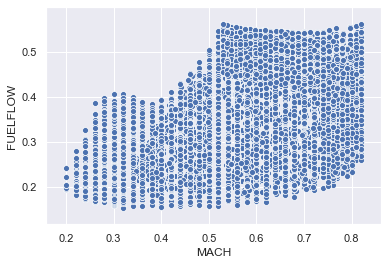

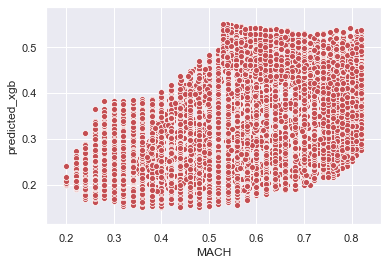

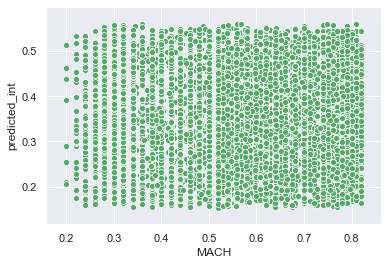

In [12]:
sns.scatterplot(x='MACH',y='FUELFLOW', data=X_test,color='b')
plt.show()

sns.scatterplot(x='MACH',y='predicted_xgb', data=X_test,color='r')
plt.show()

sns.scatterplot(x='MACH',y='predicted_int', data=X_test,color='g')
plt.show()

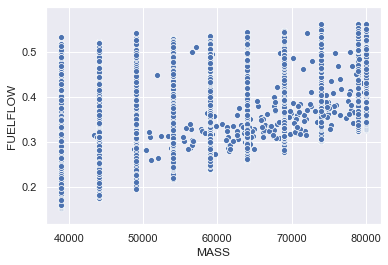

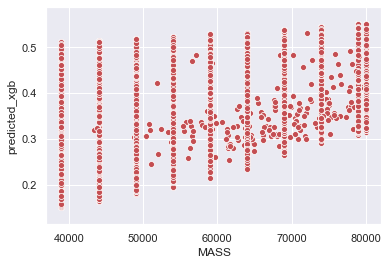

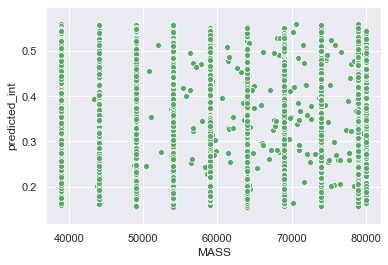

In [13]:
sns.scatterplot(x='MASS',y='FUELFLOW', data=X_test,color='b')
plt.show()

sns.scatterplot(x='MASS',y='predicted_xgb', data=X_test,color='r')
plt.show()

sns.scatterplot(x='MASS',y='predicted_int', data=X_test,color='g')
plt.show()